# Computer Vision for Beginners: Part 4

This is the second part of OpenCV tutorial for beginners and the complete set of the series is as follows:

- Part 1: Understanding color models and drawing figures on images 
- Part 2: The basics of image processing with filtering
- Part 3: From feature detection to face detection
- ***Part 4: Contour detection and having a little bit of fun***

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img, cmap = None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = cmap)

## Contour Detection

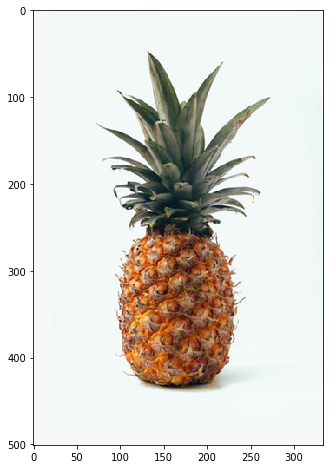

In [5]:
# load the iamge
img = cv2.imread('images/pine_apple.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display(img)

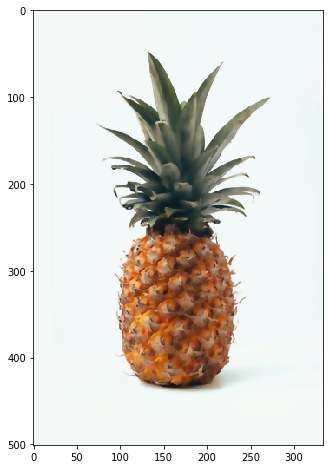

In [6]:
# Blurring for removing the noise 
img_blur = cv2.bilateralFilter(img, d = 7, 
                               sigmaSpace = 75, sigmaColor =75)
display(img_blur)

In [7]:
# Convert to grayscale 
img_gray = cv2.cvtColor(img_blur, cv2.COLOR_RGB2GRAY)

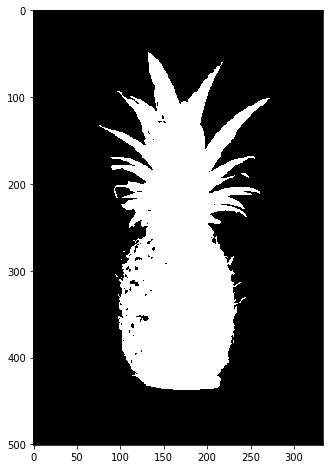

In [8]:
# Apply the thresholding  
a = img_gray.max()
_, thresh = cv2.threshold(img_gray, a/2+60, a, cv2.THRESH_BINARY_INV)
display(thresh, cmap = 'gray')

In [9]:
# Find the contour of the figure 
image, contours, hierarchy = cv2.findContours(thresh, 
                                              mode = cv2.RETR_TREE, 
                                              method = cv2.CHAIN_APPROX_SIMPLE)

In [15]:
# Sort the contours 
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

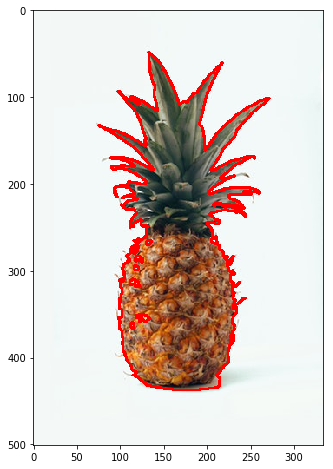

In [17]:
# Draw the contour 
img_copy = img.copy()
final = cv2.drawContours(img_copy, contours, contourIdx = -1, 
                         color = (255, 0, 0), thickness = 2)
display(img_copy)

## More about contours

In [30]:
# The first order of the contours
c_0 = contours[0]
c_0

array([[[132,  48]],

       [[133,  49]],

       [[133,  59]],

       ...,

       [[140,  54]],

       [[139,  54]],

       [[133,  48]]], dtype=int32)

In [29]:
# image moment
M = cv2.moments(c_0)
M

{'m00': 37554.5,
 'm10': 6273036.333333333,
 'm01': 10101460.333333332,
 'm20': 1092354499.5833333,
 'm11': 1684260479.5416665,
 'm02': 3081573002.583333,
 'm30': 197527768549.0,
 'm21': 292757439791.11664,
 'm12': 513096225411.75,
 'm03': 1019206688041.6001,
 'mu20': 44517759.92976034,
 'mu11': -3069339.5406122208,
 'mu02': 364468504.6960821,
 'mu30': 190498293.70715332,
 'mu21': -40160777.76402283,
 'mu12': 6987483.2384262085,
 'mu03': -5749461973.444946,
 'nu20': 0.03156525737495785,
 'nu11': -0.0021763110435795287,
 'nu02': 0.2584258995499687,
 'nu30': 0.0006970053789190334,
 'nu21': -0.00014694240866076953,
 'nu12': 2.5566178612479464e-05,
 'nu03': -0.021036439977473082}

In [50]:
# The area of contours 
print("1st Contour Area : ", cv2.contourArea(contours[0]))
print("2nd Contour Area : ", cv2.contourArea(contours[1]))
print("3rd Contour Area : ", cv2.contourArea(contours[2]))

1st Contour Area :  37554.5
2nd Contour Area :  75.0
3rd Contour Area :  54.0


In [37]:
# The length of contours 
print("1st Contour Arc Length (Closed): ", cv2.arcLength(contours[0], closed = True))
print("1st Contour Arc Length (Open): ", cv2.arcLength(contours[0], closed = False))

1st Contour Arc Length (Closed):  2473.3190953731537
1st Contour Arc Length (Open):  2472.3190953731537


In [46]:
# The center point
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])

In [47]:
# The extreme points
l_m = tuple(c_0[c_0[:, :, 0].argmin()][0])
r_m = tuple(c_0[c_0[:, :, 0].argmax()][0])
t_m = tuple(c_0[c_0[:, :, 1].argmin()][0])
b_m = tuple(c_0[c_0[:, :, 1].argmax()][0])

pst = [l_m, r_m, t_m, b_m]
xcor = [p[0] for p in pst]
ycor = [p[1] for p in pst]

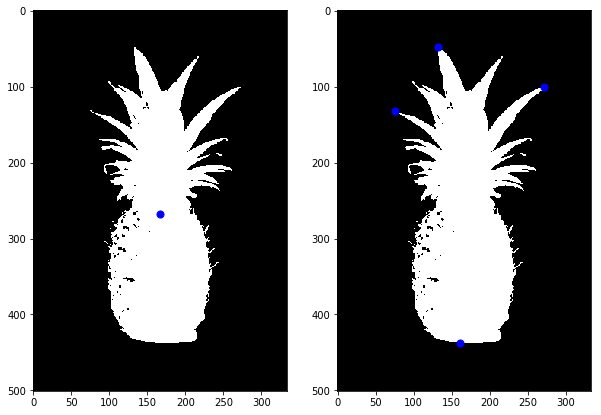

In [49]:
# Plot the points
plt.figure(figsize = (10, 16))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap = 'gray')
plt.scatter([cx], [cy], c = 'b', s = 50)

plt.subplot(1, 2, 2)
plt.imshow(image, cmap = 'gray')
plt.scatter(xcor, ycor, c = 'b', s = 50)

## Other shapes of contours

In [20]:
# The first order of contours
c_0 = contours[0]

# Get the 4 points of the bounding rectangle
x, y, w, h = cv2.boundingRect(c_0)

# Draw a rectangle with the points
img_copy = img.copy()
img_box = cv2.rectangle(img_copy, (x, y), (x+w, y+h), color = (255, 0, 0), thickness = 2)

In [21]:
# Get the 4 points of the bounding rectangle with the minimum area
rect = cv2.minAreaRect(c_0)
box = cv2.boxPoints(rect)
box = box.astype('int')

# Draw a contour with the points 
img_copy = img.copy()
img_box_2 = cv2.drawContours(img_copy, contours = [box], 
                           contourIdx = -1, 
                           color = (255, 0, 0), thickness = 2)

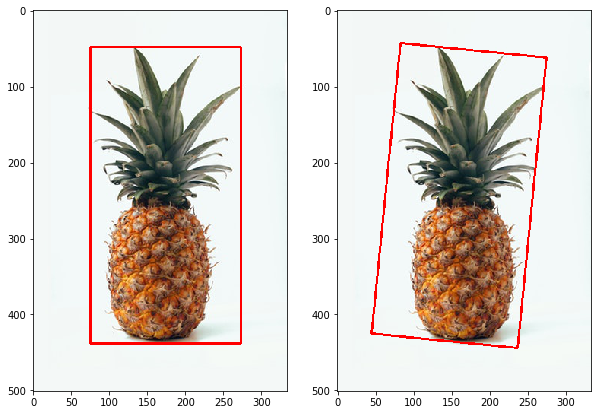

In [24]:
plt.figure(figsize = (10, 16))
plt.subplot(1, 2, 1); plt.imshow(img_box)
plt.subplot(1, 2, 2); plt.imshow(img_box_2)

In [ ]:
hull = cv2.convexHull(c_0)
img_copy = img.copy()
img_hull = cv2.drawContours(img_copy, contours = [hull], contourIdx = 0, 
                            color = (255, 0, 0), thickness = 2)
display(img_hull)

## Having a little fun with OpenCV

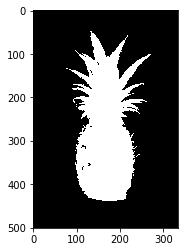

In [104]:
img_copy = cv2.cvtColor(img_copy, cv2.COLOR_RGB2GRAY)
img_copy[img_copy < 255] = 0
plt.imshow(img_copy, cmap = 'gray')

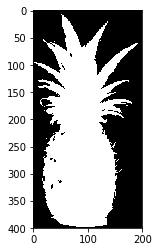

In [105]:
mask_inv = img_copy[40:440, 80:280]
plt.imshow(mask_inv, cmap = 'gray')

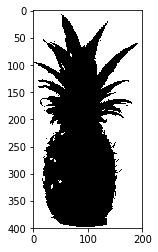

In [106]:
mask = cv2.bitwise_not(mask_inv)
plt.imshow(mask, cmap = 'gray')

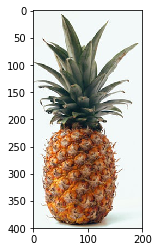

In [109]:
img_2 = img[40:440, 80:280]
plt.imshow(img_2)

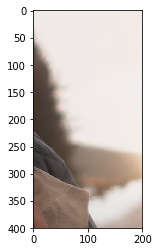

In [108]:
backpacker = cv2.imread('images/backpacker.jpg')
backpacker = cv2.cvtColor(backpacker, cv2.COLOR_BGR2RGB)
roi = backpacker[900:1300, 850:1050]
plt.imshow(roi)

In [70]:
img_gray = cv2.cvtColor(img_2, cv2.COLOR_RGB2GRAY)
img_gray.max()

255

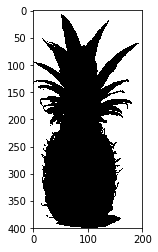

In [71]:
_, mask = cv2.threshold(img_gray, 254/2+100, 255, cv2.THRESH_BINARY)
plt.imshow(mask, cmap = 'gray')

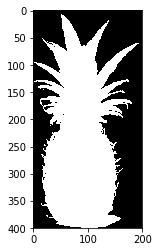

In [72]:
mask_inv = cv2.bitwise_not(mask)
plt.imshow(mask_inv, cmap = 'gray')

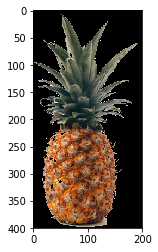

In [110]:
img_fg = cv2.bitwise_and(img_2, img_2, mask = mask_inv)
plt.imshow(img_fg)

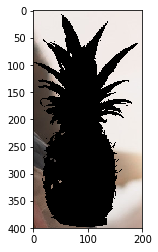

In [111]:
img_bg = cv2.bitwise_and(roi, roi, mask = mask)
plt.imshow(img_bg)

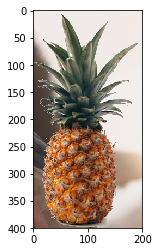

In [112]:
dst = cv2.add(img_fg, img_bg)
plt.imshow(dst)

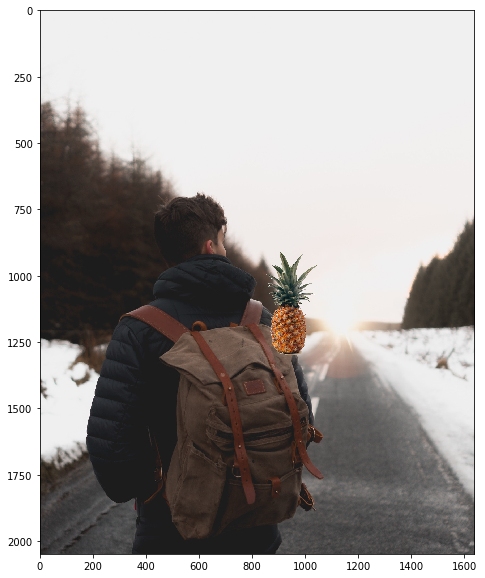

In [113]:
backpacker[900:1300, 850:1050] = dst
display(backpacker)